In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df1 = pd.read_csv('data_sets/sleep_health.csv')
df2 = pd.read_csv('data_sets/refined_survey.csv')
merged_df = pd.concat([df1, df2], axis=0)


In [5]:
merged_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Unnamed: 0
0,1.0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200.0,NaN,NaN
1,2.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN,NaN
2,3.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN,NaN
3,4.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000.0,Sleep Apnea,NaN
4,5.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000.0,Sleep Apnea,NaN


In [6]:
merged_df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
merged_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1.0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200.0,NaN
1,2.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN
2,3.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN
3,4.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000.0,Sleep Apnea
4,5.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000.0,Sleep Apnea


In [14]:
merged_df.columns
merged_df.drop(columns=['Person ID'], inplace=True)

In [16]:
merged_df.isnull().sum()

Gender                       0
Age                          0
Occupation                  48
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 1
Blood Pressure               1
Heart Rate                  48
Daily Steps                 48
Sleep Disorder             267
dtype: int64

In [19]:
merged_df.fillna(merged_df['BMI Category'].mode(), inplace=True) # filling categorical variable with mode
merged_df.fillna(merged_df['Blood Pressure'].mode(), inplace=True)

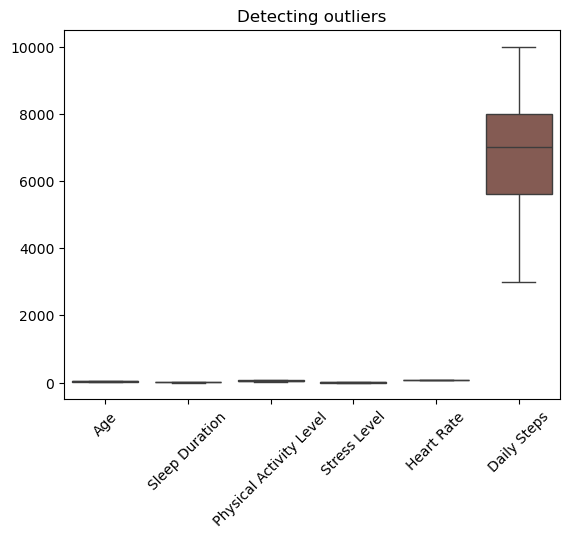

In [31]:
plt.Figure(figsize=(8,6))
sns.boxplot(data=merged_df)
plt.title("Detecting outliers")
plt.xticks(rotation=45)
plt.show()

In [30]:
# First, identify the outlier condition for the 'Heart Rate' and 'Sleep Duration' columns

# For 'Heart Rate' column:
Q1_hr = merged_df['Heart Rate'].quantile(0.25)
Q3_hr = merged_df['Heart Rate'].quantile(0.75)
IQR_hr = Q3_hr - Q1_hr
outliers_condition_hr = (merged_df['Heart Rate'] < (Q1_hr - 1.5 * IQR_hr)) | (merged_df['Heart Rate'] > (Q3_hr + 1.5 * IQR_hr))

# For 'Sleep Duration' column:
Q1_sd = merged_df['Sleep Duration'].quantile(0.25)
Q3_sd = merged_df['Sleep Duration'].quantile(0.75)
IQR_sd = Q3_sd - Q1_sd
outliers_condition_sd = (merged_df['Sleep Duration'] < (Q1_sd - 1.5 * IQR_sd)) | (merged_df['Sleep Duration'] > (Q3_sd + 1.5 * IQR_sd))

# Replace outliers with the median value
merged_df.loc[outliers_condition_hr, 'Heart Rate'] = merged_df['Heart Rate'].median()
merged_df.loc[outliers_condition_sd, 'Sleep Duration'] = merged_df['Sleep Duration'].median()

# Verify the changes
print(merged_df[outliers_condition_hr][['Heart Rate']])
print(merged_df[outliers_condition_sd][['Sleep Duration']])


Empty DataFrame
Columns: [Heart Rate]
Index: []
    Sleep Duration
19             7.1
21             7.1


In [32]:
merged_df.nunique()

Gender                      2
Age                        40
Occupation                 11
Sleep Duration             32
Quality of Sleep            9
Physical Activity Level    40
Stress Level                8
BMI Category                4
Blood Pressure             27
Heart Rate                 12
Daily Steps                20
Sleep Disorder              2
dtype: int64

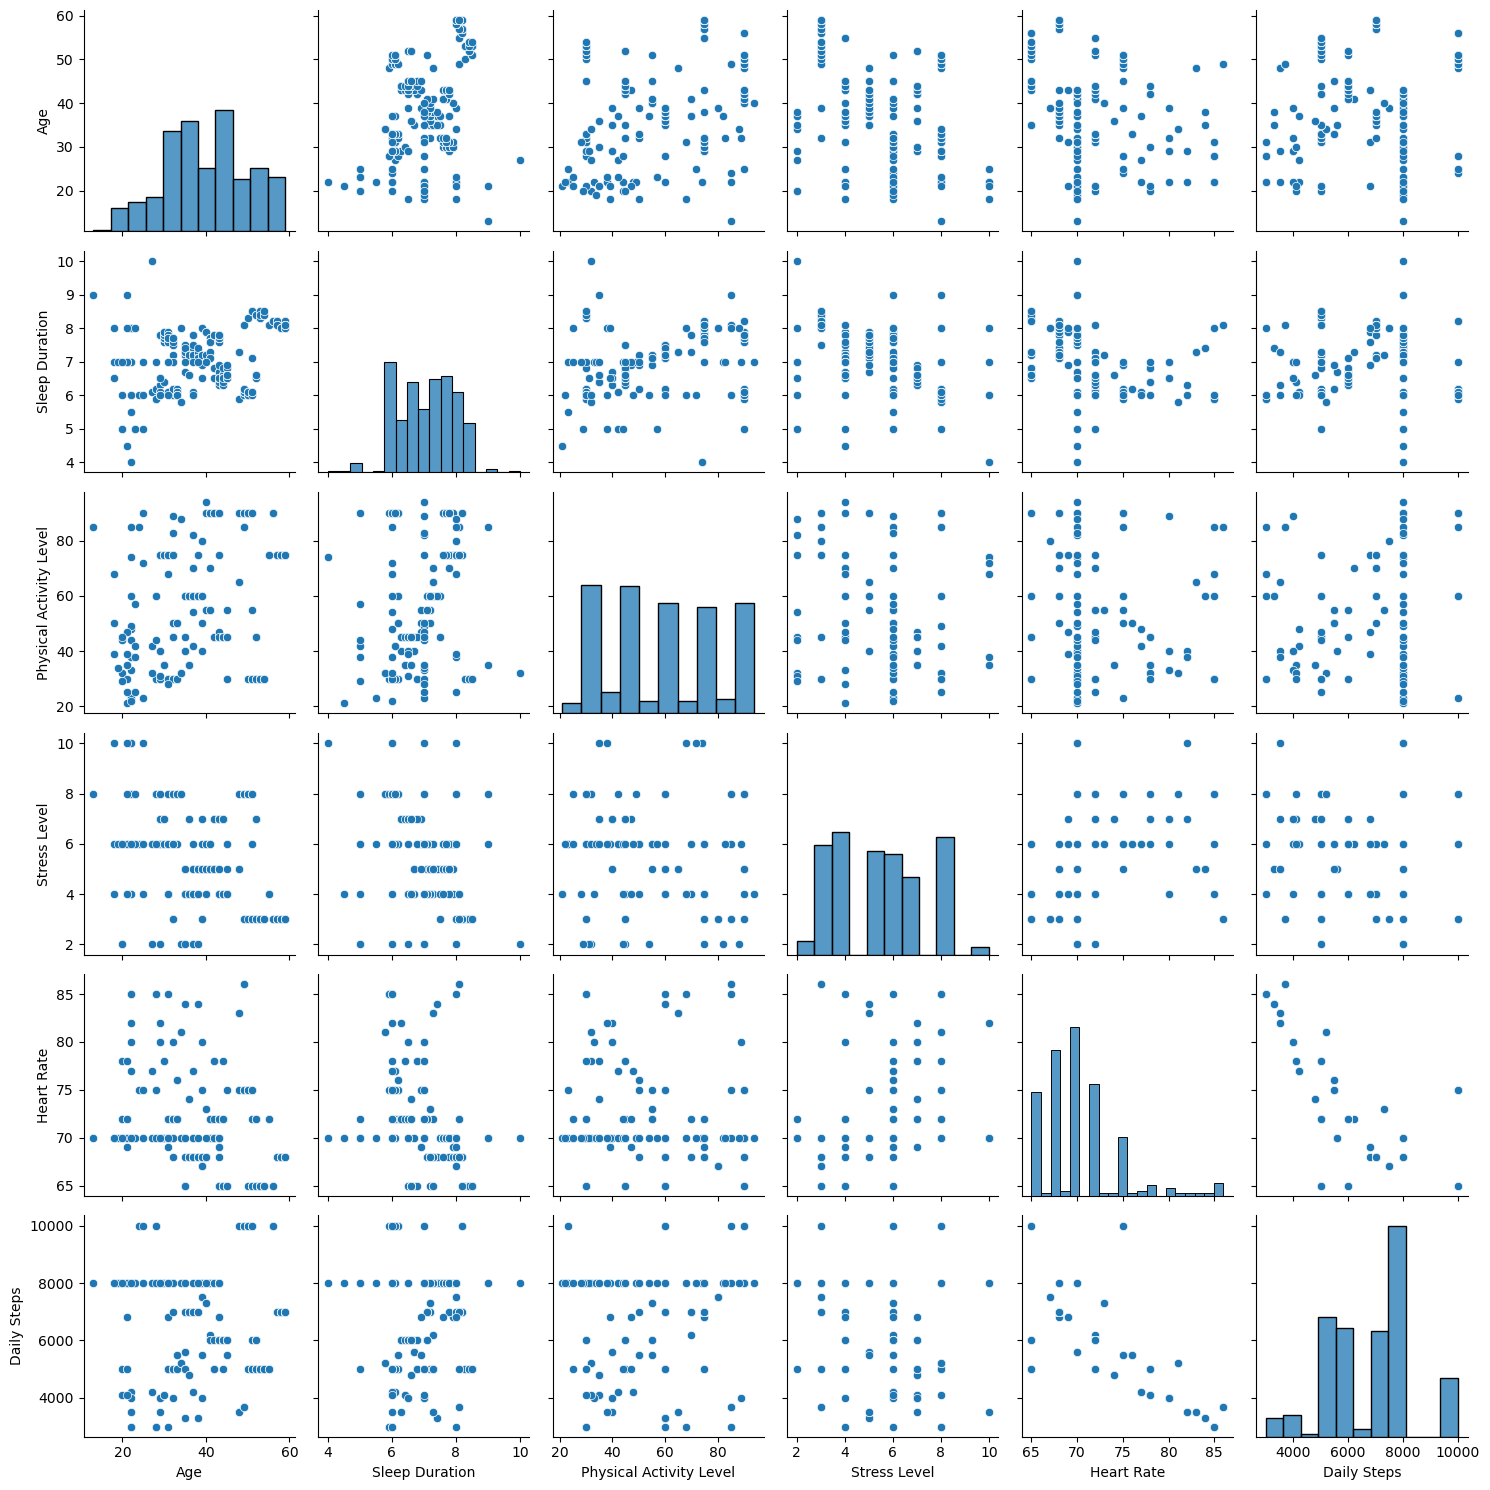

In [15]:
# pairplot for relationship
plt.Figure(figsize=(12, 8))
sns.pairplot(merged_df)
plt.tight_layout()
plt.show()